IDL Project 1

Rowan Mascarenhas - ID: 1797865 - 4/7/24

Image Classification between cats and dogs

The dataset functions similarly to class examples, but comes from a different source: https://www.kaggle.com/datasets/tongpython/cat-and-dog?rvi=1

As the .zip file can't be directly uploaded for submission, the .zip file need to be donloaded from the link

Other datasets were tested, but many did not have test/training data set up, which caused problems when compiling.


In [ ]:
# For this example, the dataset is downloaded as a .zip file, instead of using googleleapis
# To run the program, the .zip file needs to be intalled from the link above. Rewrite that file name into 'local_zip', and into 'base_dir'

import os
import zipfile

local_zip = '/tmp/cats_dogs_2.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Base_dir path will need to be changed based on the name of the file downloaded as well

base_dir = '/tmp/cats_dogs_2'
train_path = os.path.join(base_dir, 'training_set')
val_path = os.path.join(base_dir, 'test_set')

# List paths to each file with images
# The path definitions needed to be broken up, because train_path and val_path are called later on. Additionally, just writing one line for train_cats, etc. resulted in errors on other parts.
train_cats = os.path.join(train_path, 'cats')
train_dogs = os.path.join(train_path, 'dogs')
val_cats = os.path.join(val_path, 'cats')
val_dogs = os.path.join(val_path, 'dogs')

In [ ]:
# Prints total number of pictures in each training and test set
# Ratio of training to test data is ~ 4:1
# Total no. of images is ~10,000

print('total training cat images:', len(os.listdir(train_cats)))
print('total training dog images:', len(os.listdir(train_dogs)))
print('total validation cat images:', len(os.listdir(val_cats)))
print('total validation dog images:', len(os.listdir(val_dogs)))

total training cat images: 4001
total training dog images: 4006
total validation cat images: 1012
total validation dog images: 1013


In [ ]:
# List all files in the path to the images for test/train data, and sort them. Even if the images are shuffled in the folder, .sort should keep the order consistent.

train_cats_fnames = os.listdir(train_cats)
train_cats_fnames.sort()

train_dogs_fnames = os.listdir(train_dogs)
train_dogs_fnames.sort()

['cat.1956.jpg', 'cat.1668.jpg', 'cat.2023.jpg', 'cat.2223.jpg', 'cat.2725.jpg', 'cat.1214.jpg', 'cat.2305.jpg', 'cat.1187.jpg', 'cat.1907.jpg', 'cat.638.jpg']
['_DS_Store', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1004.jpg', 'dog.1005.jpg']


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

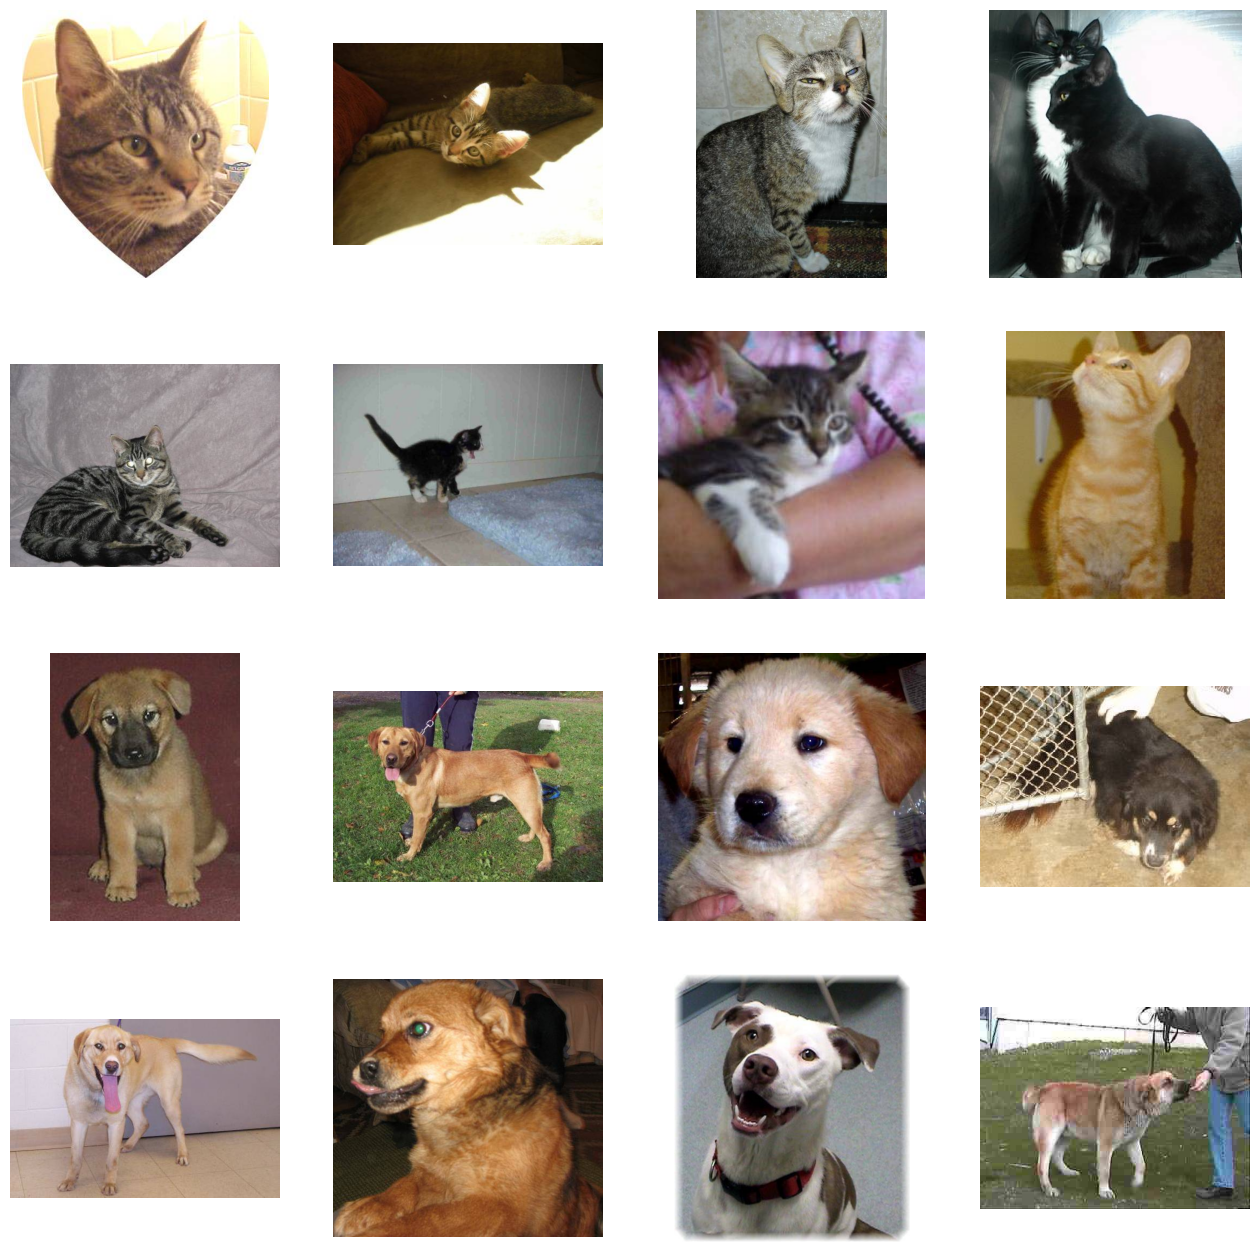

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics. Cats make up the firt 2 rows, dogs; the last 2 rows.
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats, fname)
                for fname in train_cats_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs, fname)
                for fname in train_dogs_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import itertools

TF version: 2.15.0
Hub version: 0.16.1
GPU is NOT AVAILABLE


In [ ]:
# All shapes set to 150x150 pixels with 3 color channels (RGB)
img_input = layers.Input(shape=(150, 150, 3))

# First convolutional layer: 8 filters of size 3x3 with ReLU activation, increasing each time per layer
# Max-pooling layer with a 2x2 window for downsampling
x = layers.Conv2D(8, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)


In [ ]:
''' An attempted version, commented out to avoid errors

model_handle =  https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4
do_fine_tuning = false

print("Building model with", model_handle)
model = tf.keras.Sequential([

    tf.keras.layers.InputLayer(input_shape=(150,150,3)),
    hub.KerasLayer(model_handle, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None,)+IMAGE_SIZE+(3,))
model.summary()'''

In [ ]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(2048, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        9280      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 256)       1477

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for train and test sets
# Processes images in batches of 50
train_generator = train_datagen.flow_from_directory(
        train_path,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=50,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=200,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=100,
      verbose=5)

# Increasing the steps per epoch has a big impact on the time needed to run this cell, as we have 10,000 images
# As there is minimal difference between the epoch parameters (especially in validation accuaracy), the number of epochs was lowered.
# Even so, the time needed to run this cell is ~60 minutes.

# With more steps and epoches, the values for loss and accuracy are consistently lower/higher respectively, an indication of the model consistently improving overall

Epoch 1/15
200/200 - 301s - loss: 0.5545 - acc: 0.7277 - val_loss: 0.5573 - val_acc: 0.7260 - 301s/epoch - 2s/step
Epoch 2/15
200/200 - 316s - loss: 0.5127 - acc: 0.7483 - val_loss: 0.6262 - val_acc: 0.6650 - 316s/epoch - 2s/step
Epoch 3/15
200/200 - 311s - loss: 0.4720 - acc: 0.7784 - val_loss: 0.5116 - val_acc: 0.7525 - 311s/epoch - 2s/step
Epoch 4/15
200/200 - 339s - loss: 0.4452 - acc: 0.7943 - val_loss: 0.4884 - val_acc: 0.7695 - 339s/epoch - 2s/step
Epoch 5/15
200/200 - 352s - loss: 0.4142 - acc: 0.8100 - val_loss: 0.4847 - val_acc: 0.7790 - 352s/epoch - 2s/step
Epoch 6/15
200/200 - 306s - loss: 0.3699 - acc: 0.8319 - val_loss: 0.6141 - val_acc: 0.7580 - 306s/epoch - 2s/step
Epoch 7/15
200/200 - 307s - loss: 0.3429 - acc: 0.8480 - val_loss: 0.5582 - val_acc: 0.7800 - 307s/epoch - 2s/step
Epoch 8/15
200/200 - 307s - loss: 0.3004 - acc: 0.8723 - val_loss: 0.5949 - val_acc: 0.7830 - 307s/epoch - 2s/step
Epoch 9/15
200/200 - 293s - loss: 0.2593 - acc: 0.8950 - val_loss: 0.7100 - val_

Attempted a version with epochs = 15, with results as follows:

Epoch 1/15
200/200 - 301s - loss: 0.5545 - acc: 0.7277 - val_loss: 0.5573 - val_acc: 0.7260 - 301s/epoch - 2s/step


Epoch 2/15
200/200 - 316s - loss: 0.5127 - acc: 0.7483 - val_loss: 0.6262 - val_acc: 0.6650 - 316s/epoch - 2s/step


Epoch 3/15
200/200 - 311s - loss: 0.4720 - acc: 0.7784 - val_loss: 0.5116 - val_acc: 0.7525 - 311s/epoch - 2s/step


Epoch 4/15
200/200 - 339s - loss: 0.4452 - acc: 0.7943 - val_loss: 0.4884 - val_acc: 0.7695 - 339s/epoch - 2s/step


Epoch 5/15
200/200 - 352s - loss: 0.4142 - acc: 0.8100 - val_loss: 0.4847 - val_acc: 0.7790 - 352s/epoch - 2s/step


Epoch 6/15
200/200 - 306s - loss: 0.3699 - acc: 0.8319 - val_loss: 0.6141 - val_acc: 0.7580 - 306s/epoch - 2s/step


Epoch 7/15
200/200 - 307s - loss: 0.3429 - acc: 0.8480 - val_loss: 0.5582 - val_acc: 0.7800 - 307s/epoch - 2s/step


Epoch 8/15
200/200 - 307s - loss: 0.3004 - acc: 0.8723 - val_loss: 0.5949 - val_acc: 0.7830 - 307s/epoch - 2s/step


Epoch 9/15
200/200 - 293s - loss: 0.2593 - acc: 0.8950 - val_loss: 0.7100 - val_acc: 0.7505 - 293s/epoch - 1s/step


Epoch 10/15
200/200 - 292s - loss: 0.2348 - acc: 0.9122 - val_loss: 0.6723 - val_acc: 0.7715 - 292s/epoch - 1s/step


Epoch 11/15
200/200 - 306s - loss: 0.1857 - acc: 0.9252 - val_loss: 0.6673 - val_acc: 0.7755 - 306s/epoch - 2s/step


Epoch 12/15
200/200 - 341s - loss: 0.1725 - acc: 0.9373 - val_loss: 0.8121 - val_acc: 0.7720 - 341s/epoch - 2s/step


Epoch 13/15
200/200 - 338s - loss: 0.1521 - acc: 0.9463 - val_loss: 0.8151 - val_acc: 0.7635 - 338s/epoch - 2s/step


Epoch 14/15
200/200 - 299s - loss: 0.1269 - acc: 0.9536 - val_loss: 0.9726 - val_acc: 0.7810 - 299s/epoch - 1s/step

Epoch 15/15
200/200 - 314s - loss: 0.1041 - acc: 0.9619 - val_loss: 1.0135 - val_acc: 0.7635 - 314s/epoch - 2s/step

Increasing the variables too much results in very long loading times; this version took ~90 mins

Text(0.5, 1.0, 'Training and validation loss')

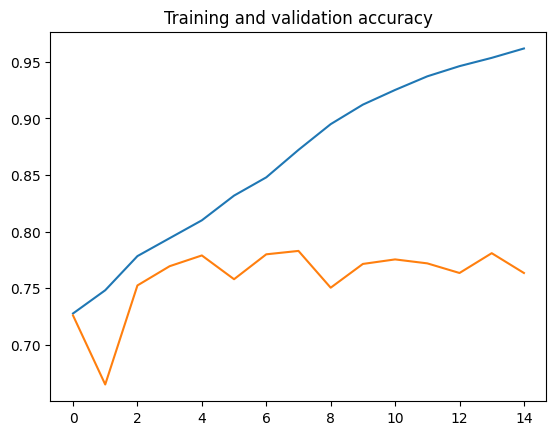

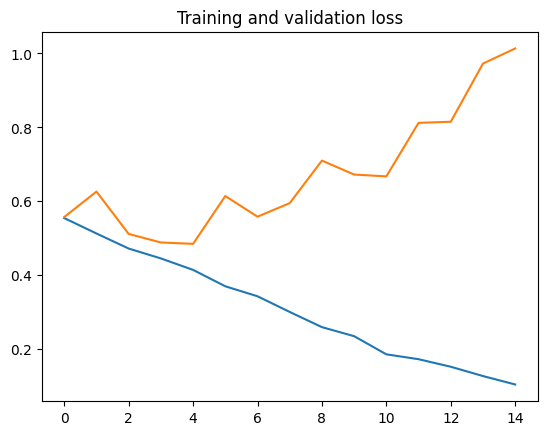

In [ ]:
# Evaluation

# Retrieve a list of accuracy and loss results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

One of the major differences with this dataset is that many of the images are sized randomly, thus a big improvement would be having one consistent image size, or to use a different dataset.

This is especially apparent hen it comes to comparing loss/accuracy in training v test datasets, where test sets continually perform worse, and are less consistent over time.